### Introduction

In the following notebook, I will be exploring the listings data set to find potential relationships of interest.

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format

#Set Visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Write file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=0,
                parse_dates=['last_review'])

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head())

Data shape: (126258, 47)


,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
accommodates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",0,77,0,1,1.00,Real Bed,1.00,2.00,1,0.00,0.00,moderate,San Francisco,100.00,25.00,2,1.00,1169,1.00,1.00,Holly,100.00,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2019-03-16,37.77,-122.43,30,1,4200.00,Western Addition,183,170.00,Apartment,0,0,1,97.00,1.55,Entire home/apt,100.00,1120.00,94117.00
2,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,4.00,Real Bed,1.00,1.00,9,9.00,0.00,strict 14 with grace period,San Francisco,50.00,12.00,1,1.00,21994,1.00,0.00,Aaron,100.00,within a few hours,"email , phone , reviews , jumio , govern...",8142,0,1,2018-09-12,37.76,-122.45,90,32,1685.00,Haight Ashbury,8,65.00,Apartment,0,0,1,93.00,0.14,Private room,200.00,490.00,94117.00
5,"TV,Internet,Wifi,Kitchen,Heating, Family/kid ...",30,90,60,90,1.50,Real Bed,2.00,2.00,2,0.00,0.00,strict 14 with grace period,San Francisco,225.00,150.00,2,1.00,24215,1.00,0.00,Rosy,100.00,within an hour,"email , phone , reviews , kba",8339,0,1,2018-08-11,37.78,-122.44,1125,7,nan,Western Addition,27,785.00,House,1,1,1,97.00,0.23,Entire home/apt,0.00,nan,94117.00
6,"TV, Cable TV ,Internet,Wifi,Kitchen, Free par...",0,20,5,9,1.00,Real Bed,2.00,3.00,1,0.00,0.00,moderate,San Francisco,125.00,0.00,1,1.00,25601,0.00,0.00,Sandy,90.00,within a day,"email , phone , facebook , reviews",8567,0,1,2019-03-30,37.78,-122.45,365,2,nan,Western Addition,32,255.00,Apartment,0,0,1,90.00,0.27,Entire home/apt,0.00,nan,94115.00
3,"TV, Cable TV ,Internet,Wifi, Paid parking off...",4,131,19,42,1.00,Real Bed,1.00,2.00,2,2.00,0.00,strict 14 with grace period,San Francisco,50.00,60.00,2,1.00,7149,0.00,1.00,Ivan & Wendy,100.00,within an hour,"email , phone , reviews , kba , work ema...",8739,1,1,2019-03-23,37.76,-122.42,14,1,9999.00,Mission,656,139.00,Condominium,0,0,1,98.00,5.57,Private room,0.00,nan,94110.00


**Variable Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126258 entries, 3 to 2
Data columns (total 47 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   amenities                                     126258 non-null  object        
 1   availability_30                               126258 non-null  int64         
 2   availability_365                              126258 non-null  int64         
 3   availability_60                               126258 non-null  int64         
 4   availability_90                               126258 non-null  int64         
 5   bathrooms                                     126258 non-null  float64       
 6   bed_type                                      126258 non-null  object        
 7   bedrooms                                      126258 non-null  float64       
 8   beds                                          126258 non-nu

**View data description**

In [6]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
availability_30,126258.00,9.53,10.50,0.00,0.00,5.00,17.00,30.00
availability_365,126258.00,143.07,126.02,0.00,25.00,107.00,263.00,365.00
availability_60,126258.00,22.90,21.05,0.00,1.00,18.00,41.00,60.00
availability_90,126258.00,38.27,31.69,0.00,5.00,35.00,66.00,90.00
bathrooms,126258.00,1.34,0.85,0.00,1.00,1.00,1.50,14.00
bedrooms,126258.00,1.35,0.92,0.00,1.00,1.00,2.00,14.00
beds,126258.00,1.77,1.21,0.00,1.00,1.00,2.00,16.00
calculated_host_listings_count,126258.00,11.64,37.52,1.00,1.00,2.00,4.00,301.00
calculated_host_listings_count_private_rooms,105994.00,2.73,7.32,0.00,0.00,0.00,2.00,87.00
calculated_host_listings_count_shared_rooms,105994.00,0.48,2.89,0.00,0.00,0.00,0.00,36.00


# Exploratory Data Analysis

## Price Distribution

**Data preparation - Remove price outliers**

In [7]:
#Calculate IQR
q1,q3 = np.quantile(df.price, [.25,.75])
IQR = q3 - q1

#Set upper and lower limits for outliers to be removed
upper = q3 + (IQR * 1.5)
lower = q1 - (IQR * 1.5)

#Print outliers
print('Outlier Count:',len(df) - len(df.loc[df.price <= upper]))

#Store data
no_outliers = df.loc[df.price <= upper]

Outlier Count: 10078


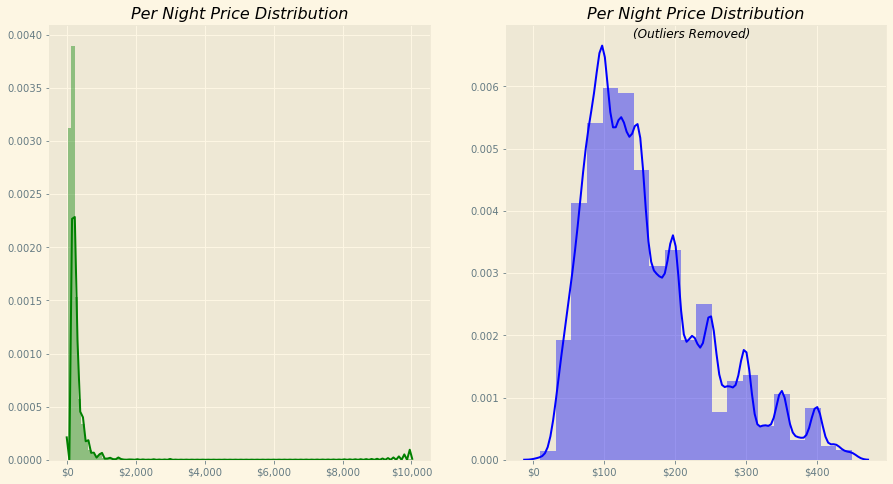

In [8]:
#Set figure
f, ax = plt.subplots(1,2,figsize = (15,8))

#Plot hist of price variable
j = sns.distplot(df.price, bins=100,ax = ax[0], color = 'green')
k = sns.distplot(no_outliers.price, bins=20,ax = ax[1], color = 'blue')

###Set Plot Aesthetics###
#Titles
j.set_title('Per Night Price Distribution', fontstyle = 'italic', fontweight = 'normal', )
k.set_title('Per Night Price Distribution', fontstyle = 'italic', )

plt.suptitle('(Outliers Removed)', y =.875,x = .72, style = 'italic', ha = 'center')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

k.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
k.set_xlabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/price_hist.png', bbox_inches='tight')

## Price Distribution by Time Features

**Prep data**

In [9]:
#Subset target with last_review date
time = no_outliers.loc[:,['last_review','price']]

#Extract time data from last_review
time['year'] = no_outliers['last_review'].dt.year
time['month']= no_outliers['last_review'].dt.month_name()
time['weekday']= no_outliers['last_review'].dt.day_name()

#Set last review as index
time.set_index('last_review', inplace = True)

#Check
time.head(15)

,price,year,month,weekday
last_review,,,,
2019-03-16,170.00,2019,March,Saturday
2018-09-12,65.00,2018,September,Wednesday
2019-03-30,255.00,2019,March,Saturday
2019-03-23,139.00,2019,March,Saturday
2019-03-29,135.00,2019,March,Friday
2019-03-31,265.00,2019,March,Sunday
2018-12-01,177.00,2018,December,Saturday
2018-08-25,194.00,2018,August,Saturday
2018-12-15,139.00,2018,December,Saturday


### Per Night Price Distribution Month

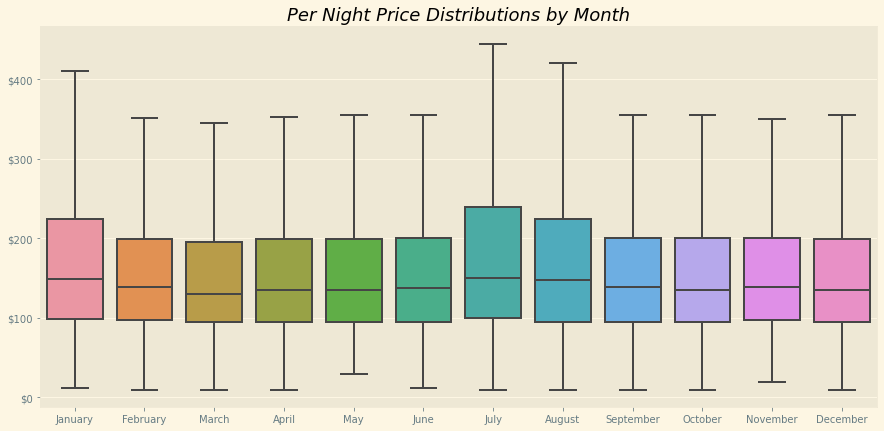

In [10]:
#Set figure size
f,ax = plt.subplots(figsize = (15,7))

#Plot data
j = sns.boxplot(x = 'month', y = 'price',
                order = ['January', 'February', 'March' ,'April', 'May', 'June', 'July', 
                         'August' ,'September', 'October' ,'November', 'December'],data = time, 
                showfliers = False,ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Per Night Price Distributions by Month', fontstyle = 'italic', fontsize = 18)

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')
j.set_ylabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/month_price_box.png', bbox_inches='tight')

### Weekday

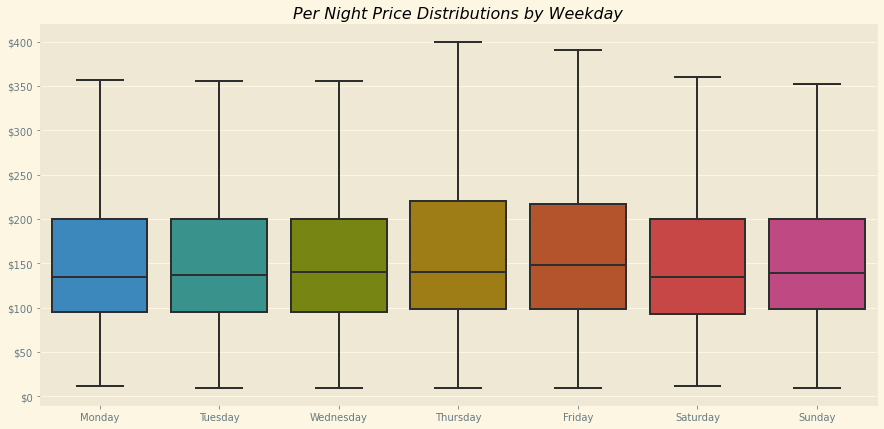

In [11]:
#Set figure size
f,ax = plt.subplots(figsize = (15,7))

#Plot data
j = sns.boxplot(x = 'weekday', y = 'price', data =time, showfliers = False,
                order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'], ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Per Night Price Distributions by Weekday', fontstyle = 'italic' )

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')
j.set_ylabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/weekday_price_box.png', bbox_inches='tight')

## Prices by Categorical Variables

### Per Night Price Distributions by Room Type

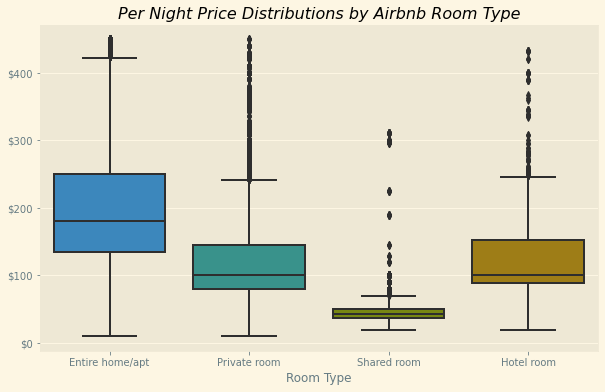

In [12]:
#Create plot
f, ax = plt.subplots(figsize = (10,6))

j = sns.boxplot(x = 'room_type', y = 'price', data = no_outliers, ax=ax)

###Set plot aesthetics
#Titles
j.set_title('Per Night Price Distributions by Airbnb Room Type', fontstyle = 'italic' )

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('Room Type')
j.set_ylabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/roomtype_price_box.png', bbox_inches='tight')

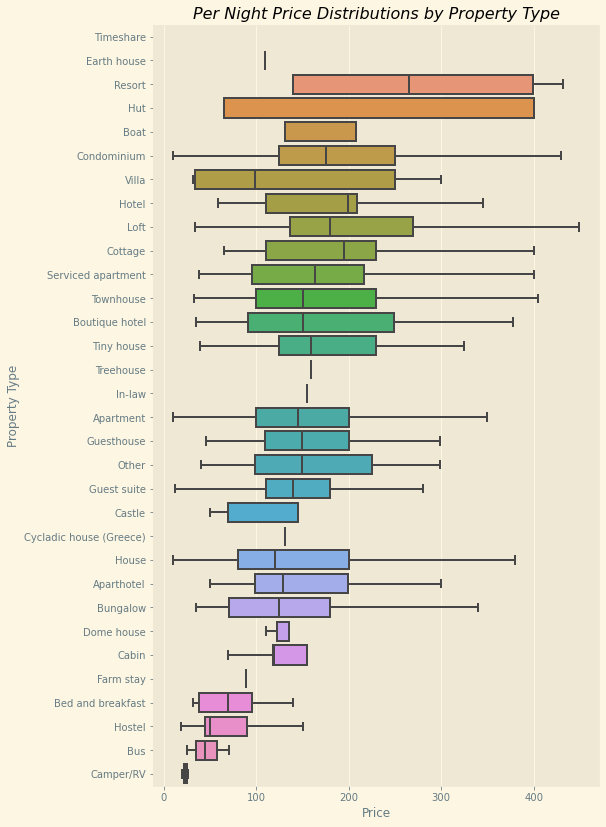

In [13]:
#Create figure
f, ax = plt.subplots(figsize = (8,14))

#Set order for boxplot(smallest to largest)
order = df.groupby('property_type')['price'].median().reset_index().sort_values(by='price', ascending = False).property_type.tolist()

#Plot boxplots for price by property type
j = sns.boxplot(y = 'property_type', x = 'price', data = no_outliers, ax=ax,showfliers = False, 
                  order = order)

###Set plot aesthetics
#Titles
j.set_title('Per Night Price Distributions by Property Type', fontstyle = 'italic' )

#Axes
j.set_ylabel('Property Type')
j.set_xlabel('Price');

#Save to Visualizations file
plt.savefig(eda_path + '/property_type.png', bbox_inches='tight')

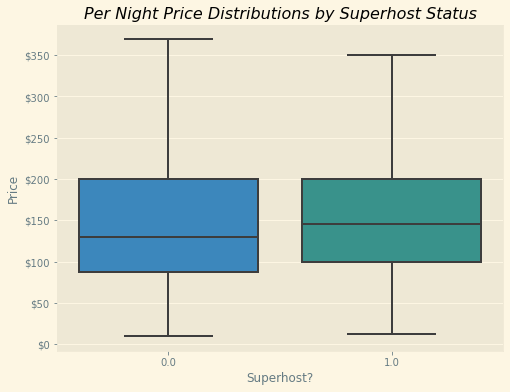

In [14]:
#Create figure
f, ax = plt.subplots(figsize = (8,6))

#Create plot
j = sns.boxplot(x = 'host_is_superhost', y = 'price', data = no_outliers,showfliers = False, ax = ax )


###Set plot aesthetics
#Titles
j.set_title('Per Night Price Distributions by Superhost Status', fontstyle = 'italic' )

#Axes
j.set_ylabel('Price')
j.set_xlabel('Superhost?');
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

#Save to Visualizations file
plt.savefig(eda_path + '/superhost.png', bbox_inches='tight')

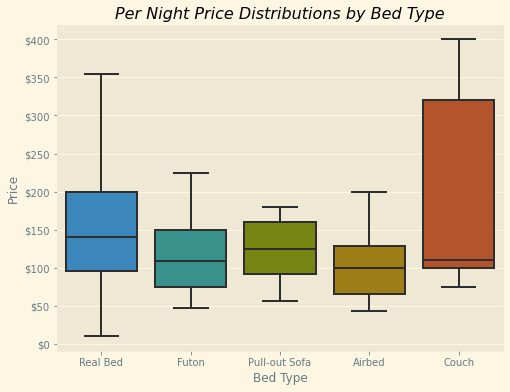

In [15]:
#Create figure
f, ax = plt.subplots(figsize = (8,6))

#PLot data
j=sns.boxplot(x = 'bed_type', y = 'price', data = no_outliers,showfliers = False,ax=ax )

###Set plot aesthetics
#Titles
j.set_title('Per Night Price Distributions by Bed Type', fontstyle = 'italic' )

#Axes
j.set_ylabel('Price')
j.set_xlabel('Bed Type');
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

#Save to Visualizations file
plt.savefig(eda_path + '/bed_type.png', bbox_inches='tight')